In [78]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from scipy.signal import find_peaks
import sys
import os
import pandas as pd

In [79]:
#Function definitions
#Import theoretical spectra. Names follow the convention "molecule form wide functional"
#molecule='68'
#form='closed'
#functional=['pbe0','pbe0-d3']
def read_theo(mol,f,fun):
    script_dir = os.getcwd()
    filename=mol+' '+f+" wide "+fun+'.txt'
#Relative path to directory with theoretical spectra e.g. 0068_closed
    rel_path='00'+mol+'_'+f+'/'
    path=os.path.join(script_dir,rel_path)
    theo_spec=genfromtxt(path+filename, delimiter='     ',dtype=float)
    return theo_spec
#Theoretical peak detection
def theo_peaks(SF,wavenumbers_theo,heights_theo):
    #D=8
    D=2
    H=0.02
    peaks_theo, _ = find_peaks(heights_theo,height=H,threshold=T,distance=D)
    return peaks_theo
#error calculation
#Calculate errors
def calculate_MAE():
    print("Error calculation:")
    #ADJUSTABLE PARAMETERS
    #tolerance for wavenumbers (when range jump is required)
    tol=100.0
    #tolerance for height ratio (when the exp and theoretical heights are so off that the band assignement must be wrong)
    htol=5.0
    error=[]
    
    #Start from the highest experimental peak
    max_exp = max(range(len(h_exp)), key=h_exp.__getitem__)
    print("Maximum exp. peak at ",y[max_exp]," height: ",h_exp[max_exp])
    #Start close with theoretical peaks
    max_position=y[max_exp]
    lst=[abs(i-max_position) for i in y_theo]
    max_theo = np.argmin(lst)
    print("Starting peak at ",y_theo[max_theo]," height: ",h_theo[max_theo])
    
    #Starting index for theoretical spectrum
    j=max_theo-5

    assigned=[]
    assigned_theo_number=[]
    assigned_exp_number=[]
# Starting index for experimental spectrum. We go right first.
    for i in range(max_exp,len(y)):
     #   print(i)
        while True:
            if y[i]<500:
                break
            if j==len(y_theo)-1:
                print("End of theoretical spectrum")
                break
   #         elif i==len(y)-1:
    #            print("End of experimental spectrum")
     #           break
            else:
                if y[i]-y_theo[j]<-tol :
                    print('error > ',tol,', skipping the experimental peak ',y[i],' cm-1 height ',h_exp[i])
                    break
     #           print(heights[i])
     #           print(heights_theo[j])

   #             if abs(y[i]-y_theo[j])<abs(y[i]-y_theo[j+1]):
                if abs(y[i]-y_theo[j])<abs(y[i]-y_theo[j+1]) and h_exp[i]/h_theo[j]<htol and h_theo[j]/h_exp[i]<htol:
                        if y[i]-y_theo[j]>tol or  y[i]-y_theo[j]<-tol:
                            print((y[i]-y_theo[j],y[i],y_theo[j]))
                            print('error > ',tol,', skipping the experimental peak')
                            break
                        else:
                            error.append(y[i]-y_theo[j])
                            assigned.append([y[i],y_theo[j]])
                            assigned_theo_number.append(j)
                            assigned_exp_number.append(i) 
                        
   #                     print("IF",(y[i]-y_theo[j],y[i],y_theo[j]))
    #                    print(h_exp[i])
    #                    print(h_theo[j])
    #                    print(heights[i])
   #                     print(heights_theo[j])
                            j=j+1
                            break
                else:
                        j=j+1
      #                  print("ELSE",(y[i]-y_theo[j],y[i],y_theo[j]))
     #                   print((y[i]-y_theo[j+1],y[i],y_theo[j+1]))
     #                   print(h_exp[i])
     #                   print(h_theo[j])
#                        error.append(y[i]-y_theo[j])
#                        assigned.append([y[i],y_theo[j]])
#                print(i,j)

 #   print(assigned_theo_number)
 #   print(assigned_exp_number)
#print(heights)
#print(heights_theo)
    print("\n {} peaks were assigned. Scaling factor of {} was used for the theoretical spectrum.\n".format(len(error),SF))
  #  t=[range(len(error)),assigned[0], assigned [1],[i/SF for i in assigned[1]], [h_exp[i] for i in assigned_exp_number],[h_theo[i] for i in assigned_theo_number]]
  #  df=pd.DataFrame(assigned,[i/SF for i in assigned[1]], [h_exp[i] for i in assigned_exp_number],[h_theo[i] for i in assigned_theo_number],["Exp. waveno. "," Scaled theor. waveno.","  Theor. unscaled waveno ","   Exp. peak height "," Theor. peak height"])
    df=pd.DataFrame(assigned,columns=["Exp. waveno.","Scaled theo. waveno."])
 #   df["Theor. unscaled waveno"]=[i/SF for i in assigned[1]]
    df["Exp. peak height"]=[h_exp[i] for i in assigned_exp_number]
    df["Theo. peak height"]=[h_theo[i] for i in assigned_theo_number]
    df['Deviations']=df["Exp. waveno."]-df["Scaled theo. waveno."]
    display(df)
 #   table=tabulate(transposedT,headers= ["Exp. waveno. "," Scaled theor. waveno.","  Theor. unscaled waveno ","   Exp. peak height "," Theor. peak height"],tablefmt='simple')
 #   print(table)
   # print("   |Exp. waveno. | Scaled theor. waveno. |  Theor. unscaled waveno | cm-1|   Exp. peak height (normalized) | Theor. peak height (normalized)")
 #   k=0
#    for i in assigned:
 #       w=assigned_exp_number[k]
 #       v=assigned_theo_number[k]
 #       print(k," | ",i[0]," | ",i[1],"         | ", i[1]/SF," |    |",h_exp[w],"         | ",h_theo[v])
  #      k=k+1

    print("\n Mean absolute error: \n")
    MAE=   sum(abs(i) for i in error)/len(error)
    print("MAE = {} cm-1".format(round(MAE,2)))
    return MAE,len(error)


In [80]:
script_dir = os.getcwd()
np.set_printoptions(precision=6,threshold=sys.maxsize)

In [81]:
#set parameters
H=0.04
#H=0.05
T=0.0
D=8
#experimental resolution
res=8.0

In [82]:
#Input data parameters
# Names of theoretical spectra files follow the convention "molecule form wide functional"
molecule='68'
form='closed'
functional=["pbe0","pbe0-d3",'b3lyp', 'b3lyp-d3', 'cam-b3lyp', 'cam-b3lyp-d3','m06l','wb97-xd']
#scaling factors for given functionals
scaling_f={'pbe0':0.95, 'pbe0-d3':0.95, 'b3lyp': 0.959, 'b3lyp-d3': 0.959, 'cam-b3lyp': 0.951, 'cam-b3lyp-d3': 0.951,'m06l': 0.951, 'wb97-xd': 0.95}


In [83]:
#Read in the experimental data for the selected molecule
#Data  in two columns without headers, separated by comma
exp_spec = genfromtxt('Sheet1_68_closed_ok.csv', delimiter=',',dtype=float)
wavenumbers=exp_spec[:,0]
heights=exp_spec[:,1]/max(exp_spec[:,1])
#height - minimal height of the peak, threshold - minimal vertical distance between a peak and its neighbor, Distance - minimal distance
peaks, _ = find_peaks(heights,height=H,threshold=T,distance=D)
y=[wavenumbers[j] for j in peaks]
h_exp=[heights[j] for j in peaks]
print("Peaks detected of min. height of {}, vertical threshold {} and {}-point distance between neighbors are: ".format(H,T,D))
print(y)
no_of_peaks=len(y)
print("{} peaks fulfilling the criteria in experimental spectrum".format(no_of_peaks))

Peaks detected of min. height of 0.04, vertical threshold 0.0 and 8-point distance between neighbors are: 
[505.2833, 555.4258, 566.033, 615.2113, 851.4601, 933.424, 968.1381, 978.7452, 986.4595, 1000.924, 1061.673, 1133.995, 1158.102, 1182.208, 1192.816, 1210.173, 1253.565, 1274.78, 1303.708, 1336.494, 1365.422, 1379.886, 1443.529, 1558.278, 1594.921, 1631.563, 1653.742, 1746.313, 2862.95, 2925.629, 2953.593, 2975.771]
32 peaks fulfilling the criteria in experimental spectrum


pbe0
Theoretical peaks detected of min. height of 0.04, vertical threshold 0.0 and 8-point distance between neighbors are: 
[496.84999999999997, 544.35, 551.9499999999999, 606.1, 628.9, 728.65, 774.25, 802.75, 833.15, 909.15, 941.4499999999999, 964.25, 981.3499999999999, 1053.55, 1079.2, 1103.8999999999999, 1130.5, 1141.8999999999999, 1165.6499999999999, 1182.75, 1206.5, 1232.1499999999999, 1290.1, 1307.2, 1331.8999999999999, 1368.95, 1381.3, 1384.1499999999999, 1609.3, 1642.55, 1653.0, 1660.6, 2902.25, 2910.7999999999997, 2981.1, 3015.2999999999997]


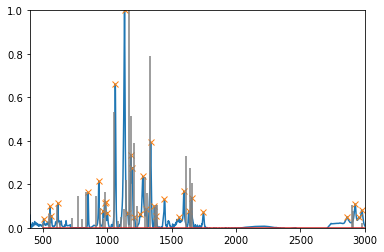

Error calculation:
Maximum exp. peak at  1133.995  height:  1.0
Starting peak at  1130.5  height:  0.08512950623853661


TypeError: list indices must be integers or slices, not numpy.float64

In [84]:
#For selected functionals read the spectra and calculate the MAEs
MAEs={}
peaks_assigned={}
for funs in functional:
    print(funs)
    theo_spec=read_theo(molecule,form,funs) 
    SF=scaling_f[funs]
    
    wavenumbers_theo=SF*theo_spec[:,0]
    heights_theo=theo_spec[:,1]/max(theo_spec[:,1])
    
    peaks_theo=theo_peaks(SF,wavenumbers_theo,heights_theo)
    
    y_theo=[wavenumbers_theo[j] for j in peaks_theo]
    print("Theoretical peaks detected of min. height of {}, vertical threshold {} and {}-point distance between neighbors are: ".format(H,T,D))
    print(y_theo)
    h_theo=[heights_theo[j] for j in peaks_theo]
    #print(h_theo)
    no_of_peaks=len(y_theo)
    
    #draw the spectra comparison
    plt.plot(wavenumbers,heights)
    plt.ylim(ymin=0,ymax=1)
    plt.xlim(xmin=400,xmax=4000)
    plt.plot(y,heights[peaks],"x")
#fig, ax = plt.subplots()
    plt.stem(y_theo, heights_theo[peaks_theo],markerfmt=' ',linefmt='grey')
#plt.stem(y_theo,heights[peaks_theo] ,markerfmt=' ',linefmt='grey')
    plt.ylim(ymin=0,ymax=1)
    plt.xlim(xmin=400,xmax=3000)
    plt.show()
    m,n=calculate_MAE()
    MAEs[funs]=m
    peaks_assigned[funs]=n
    print(m,n)
    
pd.set_option('display.precision', 2)
print("Calculated MAEs for each functional:")
df=pd.DataFrame.from_dict(MAEs,orient='index',columns=['MAE'])
df['No. of assigned peaks']=peaks_assigned.values()

display(df)
#for funs in functional:
#    print(funs,MAEs[funs],peaks_assigned[funs])
    